# Ecommerce Fraud - Exploratory Data Analysis

### There are two datsets containing information about the customer, orders placed, transactions details, payment methods used and whether the customer is performing fraudulent transaction or not.

#### Tasks to perform on the data:
    1) Perform exploratory analysis on the datasets.
    2) Summarise the key trends in the data, providing visualisations as necessary.
    3) Point out the factors that are significant and insignificant in contributing to fraud.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import dataset having customer details

In [2]:
df = pd.read_csv(r"C:\Users\oman\Desktop\PHPPRO\Ecom_Fraud\customer_details.csv")

In [3]:
df.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


### Performing basic analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


In [5]:
df.shape

(168, 10)

In [6]:
df.describe()

,Unnamed: 0,No_Transactions,No_Orders,No_Payments
count,168.000000,168.000000,168.000000,168.000000
mean,83.500000,3.708333,2.845238,2.035714
std,48.641546,2.801527,1.981919,2.113240
min,0.000000,0.000000,0.000000,0.000000
25%,41.750000,1.000000,1.000000,1.000000
50%,83.500000,4.000000,3.000000,1.000000
75%,125.250000,5.000000,4.000000,2.000000
max,167.000000,15.000000,8.000000,15.000000


### Import dataset having customer transaction details

In [7]:
df1 = pd.read_csv(r'C:\Users\oman\Desktop\PHPPRO\Ecom_Fraud\cust_transaction.csv')

### Performing basic analysis

In [8]:
df1.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [9]:
df1.shape

(623, 11)

In [10]:
df1.describe()

,Unnamed: 0,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,623.000000,623.000000,623.000000,623.000000
mean,311.000000,0.131621,34.598716,0.269663
std,179.988889,0.338350,20.360247,0.444141
min,0.000000,0.000000,10.000000,0.000000
25%,155.500000,0.000000,21.000000,0.000000
50%,311.000000,0.000000,34.000000,0.000000
75%,466.500000,0.000000,45.000000,1.000000
max,622.000000,1.000000,353.000000,1.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


### Exploratory Data Analysis
#### Below are the steps involved to understand, clean and prepare your data for building your predictive model:

    1) Univariate Analysis
    2) Bi-variate Analysis
    3) Missing values treatment
    4) Outlier treatment
    5) Variable transformation

### Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.

<b>Continuous Variables:- </b> In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics such as Histogram, distplot(Frequency), Box plots(Outliers) etc. 

<b>Categorical Variable:</b> we can plot the Frequency using countplot or use value_counts() etc.

#### Lets analyse columns in df1

In [12]:
df1['paymentMethodType'].value_counts()

card         479
apple pay     49
paypal        48
bitcoin       47
Name: paymentMethodType, dtype: int64

In [13]:
df1['paymentMethodProvider'].value_counts()

JCB 16 digit                   118
VISA 16 digit                   96
Maestro                         69
Voyager                         61
Diners Club / Carte Blanche     58
VISA 13 digit                   58
American Express                45
JCB 15 digit                    45
Discover                        41
Mastercard                      32
Name: paymentMethodProvider, dtype: int64

In [14]:
df1['orderState'].value_counts()

fulfilled    516
failed        63
pending       44
Name: orderState, dtype: int64

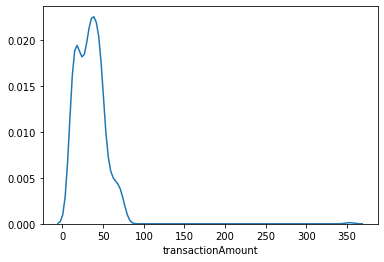

In [15]:
sns.distplot(df1['transactionAmount'], hist=False)

### Bi-Variate Analysis
Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical (countplot), Categorical & Continuous and Continuous & Continuous (lineplot). Different methods are used to tackle these combinations during analysis process.

<b>Lets compare our continous variables with our target categorical variable Fraud in df</b>

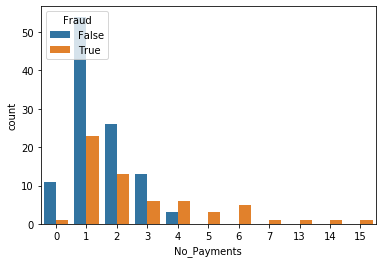

In [16]:
sns.countplot(df['No_Payments'],hue =df['Fraud'])

If Number of Payments are greater than 4 then customer is surely a fraud

In [17]:
df.loc[df['No_Payments']>4] # All the transactions where No_Payments is greater than 4

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True
29,29,catherine64@gmail.com,563-396-2038x288,myjxxvd3jfn1eymfy50n,1289:d2a9:c65d:8fc7:7be4:129b:d7b:cf7b,"372 Michael Club Suite 553\nHerrerafort, MH 52953",5,4,6,True
60,60,joserowland@jones.com,698-954-1805,znzp16ko7mtwjfxgrle4,152.211.139.83,"1292 Tricia Key Suite 062\nMarthabury, KS 40445",4,4,6,True
68,68,cathy42@gibson.com,754.248.6239x43965,c3r2qzqwc9anp6utob7n,7493:ab04:47ff:3a14:67d6:a128:a5b6:1500,"046 Carson Crescent\nSouth Jacksonview, NV 228...",3,3,15,True
80,80,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,True
93,93,craig83@rasmussen-alvarado.com,122-259-7479x336,s93o0wj3eqd9whcy9ng3,35.212.254.226,"10068 Adam Rapids Suite 792\nRileyburgh, GA 11372",2,2,13,True
98,98,david45@gmail.com,(508)223-3834,l6qv05oe0h0j78kx84ex,9d8d:535b:36fc:8773:bec0:8fa5:3206:4cb5,"5360 Adams Falls Suite 829\nHensleymouth, WV 8...",10,8,5,True
120,120,iray@rogers.com,738-700-9649x102,qkkvc35qa3mx8g1t1jr2,4338:887b:3e9b:f16d:7257:2a21:6559:e9a4,Unit 4843 Box 7401\nDPO AP 92304-9120,5,5,5,True
121,121,ctaylor@yahoo.com,1-020-923-6697x8718,uu141ykhyig0cj3s98jr,dda2:66e0:4279:3c1b:ac29:4cbb:5ea3:c26b,"87096 Warren Turnpike\nHowellview, WA 74727-2420",8,6,6,True


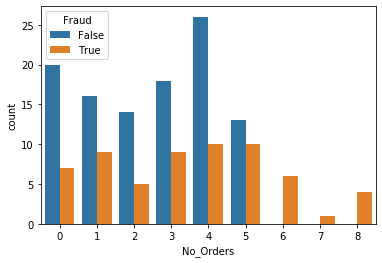

In [18]:
sns.countplot(df['No_Orders'],hue =df['Fraud'])

If number of orders are greater than 5 then the customer is surely a fraud

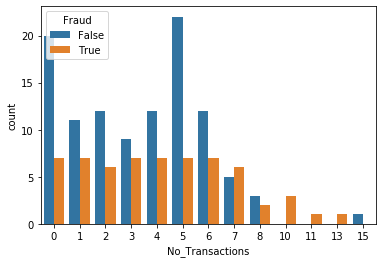

In [19]:
sns.countplot(df['No_Transactions'], hue=df['Fraud'])

Customer with number of transactions above 8 seems to be doing fraud

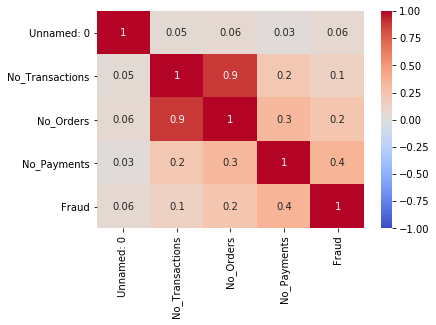

In [20]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1g',vmin=-1, vmax=1, center=0)

<b>Lets compare our continous variables in df1</b>

In [21]:
df1.head(3)

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled


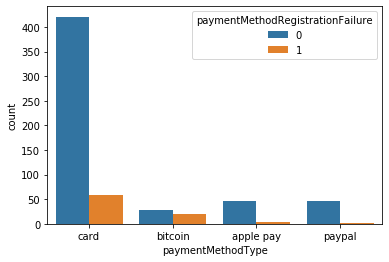

In [22]:
sns.countplot(df1['paymentMethodType'], hue=df1['paymentMethodRegistrationFailure'])

Registration failure most common with card payments

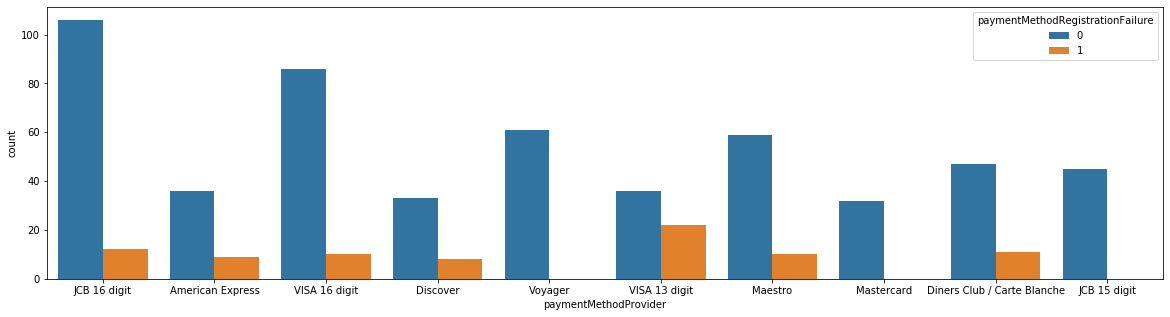

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(df1['paymentMethodProvider'], hue=df1['paymentMethodRegistrationFailure'])

Visa 13 payment provider had most registration failures

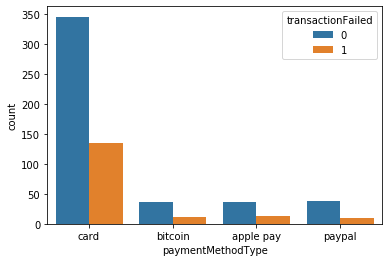

In [24]:
sns.countplot(df1['paymentMethodType'], hue=df1['transactionFailed'])

Most transactions failed with card payments

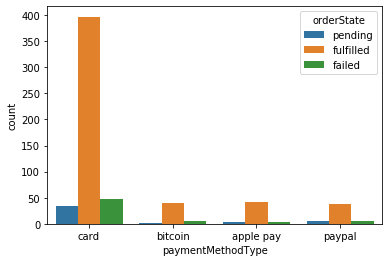

In [25]:
sns.countplot(df1['paymentMethodType'], hue=df1['orderState'])

Large number of orders failed when using card

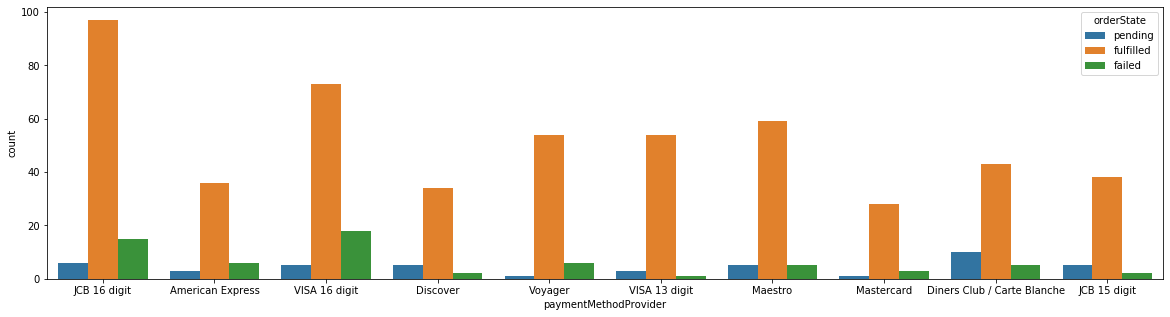

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(df1['paymentMethodProvider'], hue=df1['orderState'])

JCB 16 and VISA 16 has most number of failed orders

### Let's focus on combining the values of two datsets
<ul>
    <li>As we know the first table consists of customer details and second table consists of transactions details of these customers.</li>
    <li>We have to merge these tables on the basis of common emails that are found in both the tables</li>
    <li>We will use left join that returns all the records from the left table and matching records from the right</li>
    <li>We will consider transaction done by a duplicate customer only once and delete the repeating transactions</li></ul>

In [27]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [28]:
df1.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [29]:
df2 = pd.merge(df, df1, on='customerEmail', how='left')
df3 = df2.drop_duplicates("customerEmail", keep='last')

In [30]:
df3.shape

(161, 18)

<b>Looking for Null Values</b>

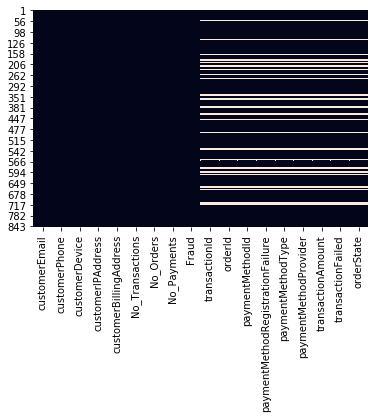

In [31]:
sns.heatmap(df3.isnull(), cbar=False)

In [32]:
df4 = df3.dropna()
df4.isnull().sum()

customerEmail                       0
customerPhone                       0
customerDevice                      0
customerIPAddress                   0
customerBillingAddress              0
No_Transactions                     0
No_Orders                           0
No_Payments                         0
Fraud                               0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

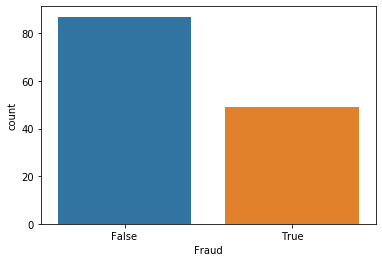

In [33]:
sns.countplot(df4["Fraud"])

In [34]:
df4.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,y4wcv03i,yp6x27,wt07xm68b,1.0,card,JCB 16 digit,26.0,0.0,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,a33145ss,bn44oh,y3xp697jx,1.0,bitcoin,VISA 16 digit,43.0,1.0,fulfilled
9,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,uo3slwh7,itnk8y,8pneoi03z,0.0,card,JCB 16 digit,25.0,0.0,fulfilled
12,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,sn3v0ql2,audx7o,pdxjdwui4,0.0,card,Voyager,25.0,0.0,fulfilled
19,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,ckk3ux58,2528x8,w1i1zq3rg,0.0,apple pay,American Express,32.0,0.0,fulfilled


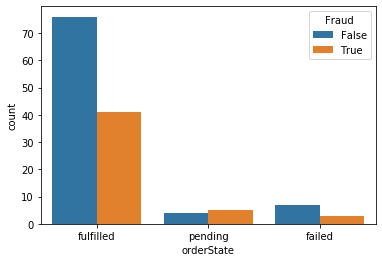

In [35]:
sns.countplot(df4['orderState'], hue=df4['Fraud'])

<ul>
    <li>Probability of Fraud happening is higher when the order state is on pending</li>
    <li>Most Fraud cases have not been detected in the early stages hence the order were fulfilled</li></ul>

In [36]:
df4.loc[df4.duplicated('customerIPAddress', keep=False)]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
243,jamescampbell@randall-pacheco.biz,599-142-6783,eaul63h9guyvwuymfn3z,45.203.99.249,"29408 Lisa Lock\nPort Jennifer, LA 26501-7040",7,3,2,True,vpzfovrf,ougwoy,c4lqxg7tb,0.0,card,Discover,47.0,1.0,fulfilled
423,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,True,kaxr9ib2,mfgt1j,v50sqfm8h,1.0,card,American Express,11.0,0.0,fulfilled
457,shelby24@hotmail.com,(071)934-3315x27613,obb41ux0zfa2td5ajo9s,45.203.99.249,"3271 Cynthia Groves\nPort Jeremyberg, CO 27305",5,4,2,True,z2u9dn7i,zjigls,ust8991vz,1.0,card,Diners Club / Carte Blanche,36.0,0.0,fulfilled
672,christinemills@mcgee.com,(651)355-4709,zbn9it3s7yl69bjtrnqf,45.203.99.249,"5156 Greene Park Apt. 748\nNew Sandra, CA 1480...",5,5,2,True,d4oenk4o,hnt2yf,xrqpqnjba,0.0,paypal,Voyager,17.0,0.0,failed


<ul>
    <li>Analysing the IP Addresses we can see that the same IP Address is used from different locations and were marked as Fraud</li>
    <li> Out of four orders three were fulfilled</li></ul>

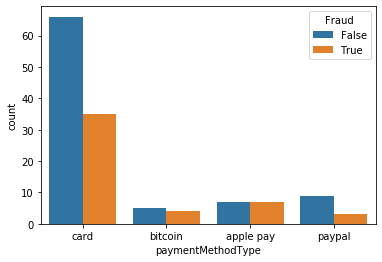

In [37]:
sns.countplot(df4['paymentMethodType'], hue=df4['Fraud'])

<ul>
    <li>Equal number of apple pay transactions were fraud and not fraud, followed by</li>
    <li>The transactions done using bitcoin which were almost equal</li>
    <li>While card payments had most number of fraud transactions</li>
    </ul>

In [38]:
df4.loc[df4['paymentMethodType']=='apple pay']

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
19,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,ckk3ux58,2528x8,w1i1zq3rg,0.0,apple pay,American Express,32.0,0.0,fulfilled
22,samuel15@saunders-rhodes.com,05045239487,up7afvce5v0omniqlevq,33.67.35.30,"3960 Emily Fort\nStaceytown, AR 21817-3325",2,1,2,True,lla8uo92,sq7rk9,je76d0ulj,0.0,apple pay,VISA 13 digit,40.0,0.0,fulfilled
86,gonzalesjackson@gmail.com,1-410-373-1228x129,hmkn4nmfc5q5mgify2zw,229.2.225.188,"566 Courtney Stream\nReedland, NH 84853",4,4,1,True,1wa1s613,u3ogjs,7964l78jo,0.0,apple pay,VISA 16 digit,41.0,0.0,fulfilled
112,harrisnicholas@mitchell-hancock.com,(922)411-5121x98410,y3m3px7h46gor851y1pu,58.13.30.104,"357 Barbara Crossroad\nJacobsburgh, WY 09289-9170",6,4,2,False,5ccytrgf,dfwo2l,llpmu63n4,0.0,apple pay,Mastercard,25.0,1.0,fulfilled
163,paul86@hotmail.com,986-625-5606,iyac5n05j0sxp2b0cnnc,aae7:6c39:b70:7025:d60d:bab3:6547:4adc,"546 Kim Walk\nSouth Jacquelinefurt, NM 01696",2,1,1,False,rk0m8roe,4w6x1p,j6vt0l11e,0.0,apple pay,JCB 16 digit,44.0,0.0,fulfilled
261,kristina41@gmail.com,1-836-334-7673,1a88bvu79nax6873na08,35.23.150.176,"5769 Ronald Brook Suite 963\nLake Jasonfurt, M...",7,6,3,True,h96uhgzk,iaousp,cm5dp45zh,0.0,apple pay,JCB 16 digit,51.0,0.0,fulfilled
391,nancymayo@brown.com,830-346-6543x518,1asmfecu4hbv73a2r5jy,79.112.154.104,"6927 Nathan Mountains\nNorth April, PA 95355-9109",7,6,2,True,4z7tp93o,c5b579,oxpsbpotn,0.0,apple pay,Diners Club / Carte Blanche,30.0,0.0,pending
428,rbolton@hotmail.com,04454448537,znuylfikiuid1orrwsvt,911e:44d8:824c:85a3:ba7a:6513:8d40:c4c3,"150 Kenneth Bypass Apt. 791\nKevinton, VT 92488",5,4,3,False,nixfmk79,h7m36s,895soyhh1,0.0,apple pay,VISA 13 digit,27.0,1.0,fulfilled
477,craig83@rasmussen-alvarado.com,122-259-7479x336,s93o0wj3eqd9whcy9ng3,35.212.254.226,"10068 Adam Rapids Suite 792\nRileyburgh, GA 11372",2,2,13,True,crl6tv84,8yj5xm,2g0jtwk7z,0.0,apple pay,Diners Club / Carte Blanche,21.0,1.0,fulfilled
606,oaguirre@hotmail.com,1-856-006-5150,cvtpgtclxkvcwvr16cyd,ae37:8e14:bfc1:43c4:7dde:7b9e:ca7f:4721,"719 Jeremy Flat Apt. 914\nAlexanderport, IA 97...",1,1,4,True,5s2j37z0,9lj87e,0d9jd80l2,0.0,apple pay,Voyager,47.0,0.0,fulfilled


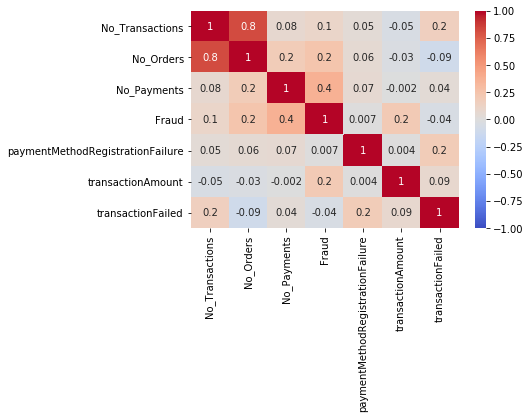

In [39]:
corr = df4.corr()
sns.heatmap(corr, annot=True, fmt='.1g', cmap='coolwarm', vmin=-1, vmax=1, center=0)